<a href="https://colab.research.google.com/github/angelahjhong/project-2/blob/main/CHD_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/angelahjhong/project-2

Cloning into 'project-2'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 79 (delta 23), reused 23 (delta 14), pack-reused 40
Receiving objects: 100% (79/79), 1.17 MiB | 3.47 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
# Basic Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
# created a correlation matrix to graph our heatmap to find a significant
# correlation between our datasets
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


In [ ]:
# Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
test_data = pd.read_csv("/content/project-2/cleaned_test_binary.csv")

vars = ['sex', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
                 'prevalentHyp', 'diabetes', 'BMI', 'glucose', 'TenYearCHD']

train_data = train_data[vars]
test_data = test_data[vars]

# in this code we are dropping the TenYearCHD variable because this is what we are running our predictions against
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD']
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD']

# initializing our models
linear_model = LinearRegression()
# training models calling the tree funcs
linear_model.fit(X_train, y_train)
# running our predictions based on our pull variable array
linear_pred = linear_model.predict(X_test)
# calculating our R^2 scores using a built in function
linear_rsq = r2_score(y_test, linear_pred)

# calculating the RMSE using a built in function
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False )
print("linear regression rsq:", linear_rsq)
print("\nlinear regression rmse:", linear_rmse)

Linear Regression rsq: 0.08944393608080903

Linear Regression rmse: 0.3389543263724163
knn_ rsq:  -0.06799274886965634
knn rmse:  0.3670895217533894


In [ ]:
# Trees
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
test_data = pd.read_csv("/content/project-2/cleaned_test_binary.csv")

vars = ['sex', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
                 'prevalentHyp', 'diabetes', 'BMI', 'glucose', 'TenYearCHD']

train_data = train_data[vars]
test_data = test_data[vars]

# in this code we are dropping the TenYearCHD variable because this is what we are running our predictions against
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD']
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD']
# after trial and error found that depth of 2 gave us our best rsq value
decision_tree_model = DecisionTreeRegressor(max_depth=2)  # Create a regression object
decision_tree_model.fit(X_train, y_train)  # Fit the regression
# running the prediction
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_rsq = r2_score(y_test, decision_tree_pred)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_pred, squared=False)
# printing the values
print("decision tree regression rsq:", decision_tree_rsq)
print("\ndecision tree regression rmse:", decision_tree_rmse)

Decision Tree Regression rsq: 0.03571913268397675
Decision Tree Regression rmse: 0.34881054922784993


In [ ]:
# KNN Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
test_data = pd.read_csv("/content/project-2/cleaned_test_binary.csv")

relevant_cols = ['sex', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
                 'prevalentHyp', 'diabetes', 'BMI', 'glucose', 'TenYearCHD']

train_data = train_data[relevant_cols]
test_data = test_data[relevant_cols]

X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD']
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD']

# Determine the optimal k
k_bar = 200
k_grid = np.arange(1, k_bar + 1)  # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat) ** 2)

SSE_min = np.min(SSE)  # lowest sum of squared errors
min_index = np.argmin(SSE)
k_star = k_grid[min_index]  # Find the optimal value of k
print("optimal k:", k_star)

# Train KNN regression with optimal k
knn_model = KNeighborsRegressor(n_neighbors=k_star)
knn_model.fit(X_train, y_train)

# Make predictions
y_hat = knn_model.predict(X_test)
rsq = r2_score(y_test, y_hat)
rmse = mean_squared_error(y_test, y_hat, squared=False)

print("rsq score:", rsq)
print("\nrmse:", rmse)
# this k value is so high...

Optimal k: 137
R^2 Score: 0.058033268766717994
RMSE: 0.3447510664821476


In [ ]:
# KNN classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
test_data = pd.read_csv("/content/project-2/cleaned_test_binary.csv")

vars = ['sex', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
                 'prevalentHyp', 'diabetes', 'BMI', 'glucose', 'TenYearCHD']

train_data = train_data[vars]
test_data = test_data[vars]

# training and testing data into features and target variables
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD']
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD']

# optimal k taken from notes
k_bar = 50 # number of values k can be
k_grid = np.arange(1, k_bar + 1)  # The range of k's to consider
accuracy_scores = []
# this for loop is just straight from our hw's and notes on knn classification
for k in range(k_bar):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    knn.fit(X_train, y_train)
    y_hat= knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    accuracy_scores.append(accuracy)

# we would add 1 because index starts from 0
k_star = np.argmax(accuracy_scores) + 1
print("optimal k:", k_star)

model = KNeighborsClassifier(n_neighbors=k_star)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("\naccuracy:", accuracy)

optimal k: 22

accuracy: 0.8537735849056604


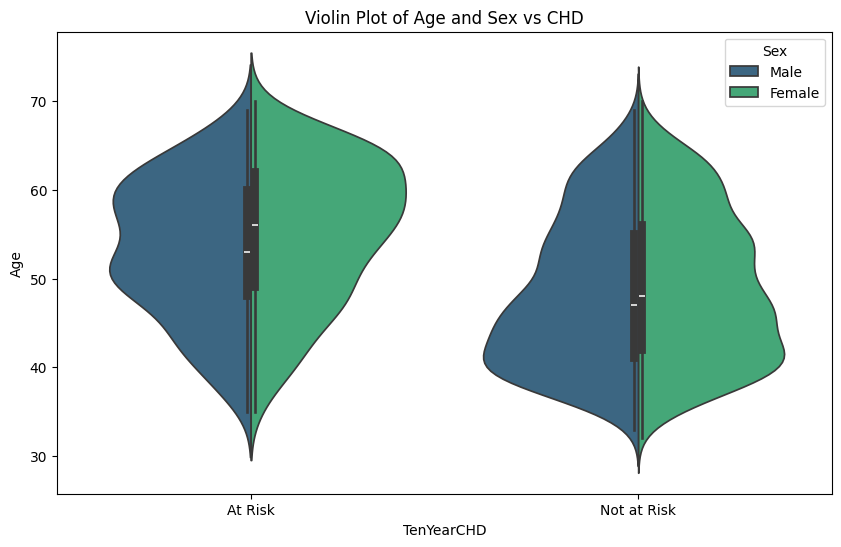

In [ ]:
# violin plot graph for age and sex vs CHD
df = pd.read_csv("/content/project-2/cleaned_train.csv")

plt.figure(figsize=(10, 6))
sns.violinplot(x='TenYearCHD', y='age', hue='sex', data=df, split=True, palette='viridis')
plt.title('Violin Plot of Age and Sex vs CHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Age')
plt.legend(title='Sex', loc='upper right')
plt.show()

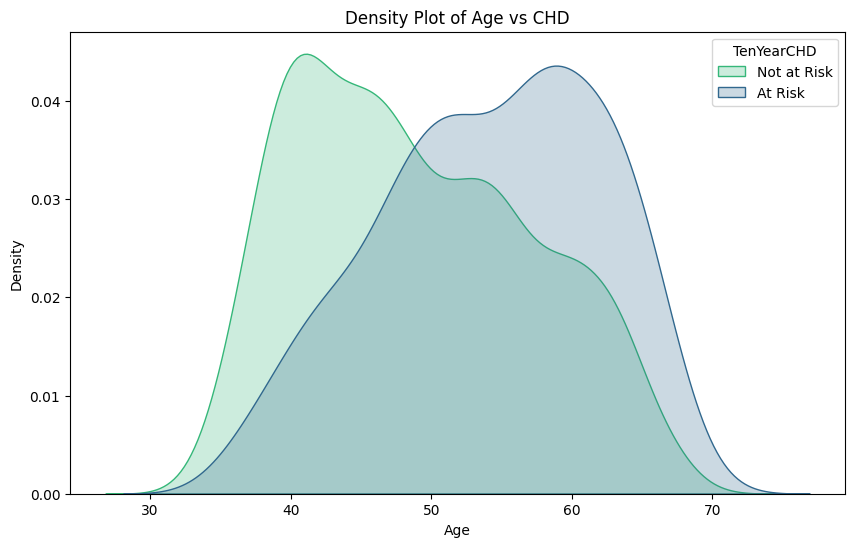

In [ ]:
# desity plot for CHD and age
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='TenYearCHD', fill=True, common_norm=False, palette='viridis')
plt.title('Density Plot of Age vs CHD')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='TenYearCHD', labels=['Not at Risk', 'At Risk'], loc='upper right')
plt.show()

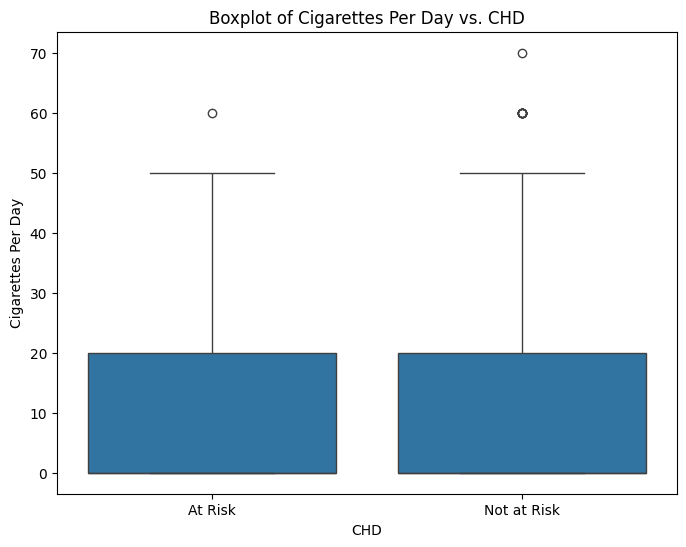

In [89]:
# boxplot for cigsperday vs CHD
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TenYearCHD', y='cigsPerDay')
plt.title('Boxplot of Cigarettes Per Day vs. CHD')
plt.xlabel('CHD')
plt.ylabel('Cigarettes Per Day')
plt.show()

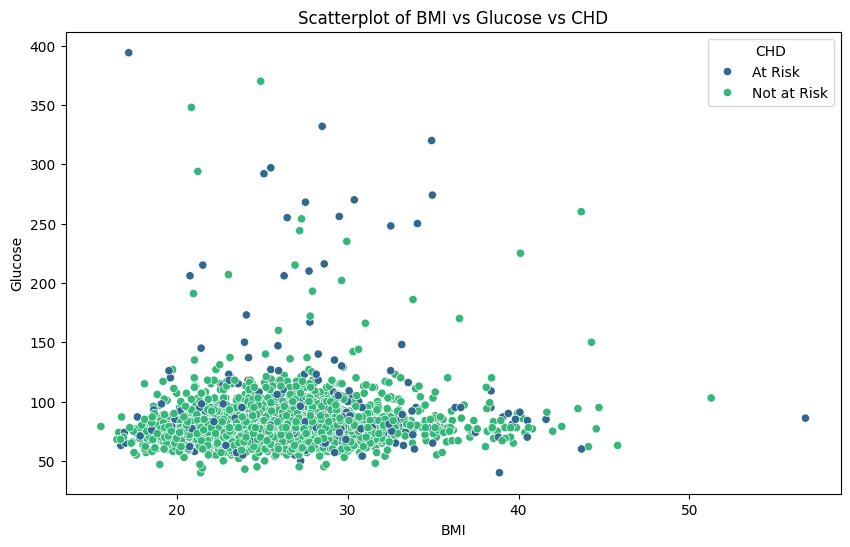

In [ ]:
# scatterplot graph for BMI vs glucose vs CHD
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='glucose', hue='TenYearCHD', palette='viridis')
plt.title('Scatterplot of BMI vs Glucose vs CHD')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(title='CHD')
plt.show()